In [2]:
import numpy as np
import matplotlib.pyplot as plt
import hamhelper.plotting as hp
# import hamhelper.colours as hc

# Q1
Solving for the allowed HCP peaks!
We start by defining the place spacing and criteria for allowed interference peaks

In [3]:
def interplanar_spacing(h, k, l, a=1):
    denom = (4/3)*(h**2 + h*k + k**2) + (l/1.63)**2
    return a/np.sqrt(denom)

def check_allowed_hcp(h, k, l):
    if h + k + l < 1:
        return False
    else:
        first_criteria = l%2 != 0
        second_criteria_a = (h + 2*k)%3 == 0
        second_criteria_b = (2*h + k)%3 == 0
        return not np.logical_and(first_criteria,
                             np.logical_or(second_criteria_a, 
                                           second_criteria_b))


Peak 712.0 has 1/d = 1.15 ->
[[[0. 1. 0.]]

 [[1. 0. 0.]]]

Peak 711.0 has 1/d = 1.23 ->
[[[0. 0. 2.]]]

Peak 710.0 has 1/d = 1.31 ->
[[[0. 1. 1.]]

 [[1. 0. 1.]]]

Peak 709.0 has 1/d = 1.68 ->
[[[0. 1. 2.]]

 [[1. 0. 2.]]]

Peak 708.0 has 1/d = 2.00 ->
[[[1. 1. 0.]]]

Peak 707.0 has 1/d = 2.17 ->
[[[0. 1. 3.]]

 [[1. 0. 3.]]]


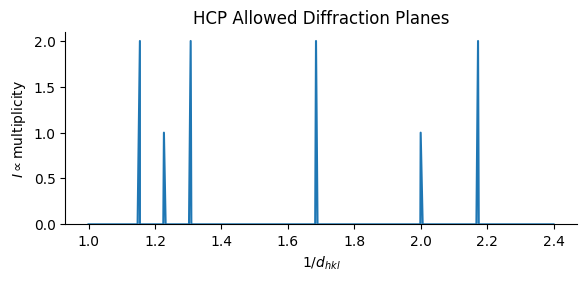

In [4]:
h_arr = np.arange(0, 12)
k_arr = np.arange(0, 12)
l_arr = np.arange(0, 12)

# Get all defined hkl's
hkl = np.array(np.meshgrid(h_arr, k_arr, l_arr)).T.reshape(-1, 3)

results_array = []
verbose = False
for h, k, l in hkl:
    if check_allowed_hcp(h, k, l):
        distance = interplanar_spacing(h, k, l)
        results_array.append([distance, h, k, l])
        if verbose:
            print(f'({h},{k},{l})\td = {distance:.3e}')
    else:
        if verbose:
            print(f'({h},{k},{l}) Not allowed!')
results_array = np.array(results_array)
sorted_results = results_array

# Check for multiplicity
unique_peaks = []  # multiplicity, d, hkl
miller_arrays = []
unique_d, multiplicity = np.unique(sorted_results[:, 0], return_counts=True)
for i, (d, m) in enumerate(zip(unique_d, multiplicity)):
    # get all hkls
    idx = np.argwhere(sorted_results[:, 0] == d)
    miller_idx = sorted_results[idx, 1:]
    unique_peaks.append([1/d, m, i])
    miller_arrays.append(miller_idx)
    if verbose:
        print(f'Unique 1/d = {1/d:.2e} w/ multiplicity of {m}')
unique_peaks = np.array(unique_peaks)
# sort in increasing 1/d
sort_args = np.argsort(unique_peaks[:, 0])
unique_peaks = unique_peaks[sort_args]

# Plotting
x = unique_peaks[:6,0]  # 1/d
y = unique_peaks[:6,1]  # mult

# # Print each peak
for invd, mult, index in unique_peaks[:6,:]:
    # print(index)
    print(f'\nPeak {index} has 1/d = {invd:.2f} ->\n{miller_arrays[int(index)]}')

x_bk = np.linspace(1, 2.4, 200)
y_bk = np.ones_like(x_bk)*0

x = np.concatenate([x, x_bk])
y = np.concatenate([y, y_bk])

sortindex = np.argsort(x)
x = x[sortindex]
y = y[sortindex]

fig, ax = plt.subplots(1, 1, figsize=(6.6,2.5))

ax.plot(x, y, '-')
ax.set(xlabel=r'$1/d_{hkl}$', ylabel = r'$I\propto$multiplicity',
       ylim=(0, 2.1), title='HCP Allowed Diffraction Planes');

hp.despine()
plt.savefig('plots/1q_peaks.png', dpi=300, bbox_inches='tight')
plt.show()